In [1]:
from config_figures import *
#import plotly.graph_objects as go
#import plotly.offline as pyo
# import seaborn as sns
# import os

# Spider plots

In [70]:
median_list = []
biome_names = []
for biome in [6,5,4,12,3,1,2]:

    if biome == 1:
        df = pd.concat([pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '_chunk_' + str(i) + '_outof_5.csv') for i in range(5)])
    else:
        df = pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '.csv' )
        
    df['turnover'] = (1- ((df.n_present - df.n_lost) / (df.n_present + df.n_gained))) * 100 # (1 - Jaccard_index) * 100
    df['frac_lost'] = df['n_lost'] / df['n_present'] * 100
    median_series = df.drop(['system:index','BIOME_NAME','BIOME_NUM','ECO_ID','ECO_NAME','REALM','.geo'], axis=1).median(axis=0, numeric_only=True)
    median_series.name = "{}) {} (n_eco={})".format(df['BIOME_NUM'].iloc[0], df['BIOME_NAME'].iloc[0], df.shape[0]) 
    median_list.append(median_series)

df_median = pd.concat(median_list, axis=1).T
df_median['biome_name'] = [
    'Boreal forests', 'Temperate conifer forests', 'Temperate broadleaf forests', 'Mediterranenan forests', 
    'Tropical coniferous forests', 'Tropical moist broadleaf forests', 'Tropical dry broadleaf forests'
]
df_median

,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_lost,biome_name
6.0) Boreal Forests/Taiga (n_eco=26),6.002923,-1.947184,6.002602,106.0,47.0,1.0,48.0,0.001464,46.076172,1.049451,Boreal forests
5.0) Temperate Conifer Forests (n_eco=47),4.002123,31.409943,4.002123,273.0,51.0,11.0,210.0,31.821971,28.020566,4.371585,Temperate conifer forests
4.0) Temperate Broadleaf & Mixed Forests (n_eco=83),3.632706,2.704764,3.499902,238.0,24.0,16.0,194.0,6.409561,19.519095,7.309487,Temperate broadleaf forests
"12.0) Mediterranean Forests, Woodlands & Scrub (n_eco=40)",2.701168,-39.976610,2.435265,176.5,5.0,27.5,196.5,0.005449,19.067727,11.704613,Mediterranenan forests
3.0) Tropical & Subtropical Coniferous Forests (n_eco=15),1.127862,34.687451,-0.027753,1309.0,40.0,77.0,1459.0,32.771066,12.108680,8.000998,Tropical coniferous forests
1.0) Tropical & Subtropical Moist Broadleaf Forests (n_eco=230),1.268841,4.516270,-0.147381,762.5,26.0,42.5,819.5,12.431565,9.040614,5.080493,Tropical moist broadleaf forests
2.0) Tropical & Subtropical Dry Broadleaf Forests (n_eco=56),1.254672,4.447121,-0.234587,1032.0,27.5,177.0,1215.0,13.163033,16.129032,14.180479,Tropical dry broadleaf forests


In [71]:
df_median = df_median.set_index('biome_name')
df_median

,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_lost
biome_name,,,,,,,,,,
Boreal forests,6.002923,-1.947184,6.002602,106.0,47.0,1.0,48.0,0.001464,46.076172,1.049451
Temperate conifer forests,4.002123,31.409943,4.002123,273.0,51.0,11.0,210.0,31.821971,28.020566,4.371585
Temperate broadleaf forests,3.632706,2.704764,3.499902,238.0,24.0,16.0,194.0,6.409561,19.519095,7.309487
Mediterranenan forests,2.701168,-39.976610,2.435265,176.5,5.0,27.5,196.5,0.005449,19.067727,11.704613
Tropical coniferous forests,1.127862,34.687451,-0.027753,1309.0,40.0,77.0,1459.0,32.771066,12.108680,8.000998
Tropical moist broadleaf forests,1.268841,4.516270,-0.147381,762.5,26.0,42.5,819.5,12.431565,9.040614,5.080493
Tropical dry broadleaf forests,1.254672,4.447121,-0.234587,1032.0,27.5,177.0,1215.0,13.163033,16.129032,14.180479


In [72]:
# normalize by the maximum value to rescale to values from 0 to max for each column
# df_norm = df_median / df_median.max()
# min-max normalisation
df_norm = (df_median - df_median.min()) / (df_median.max() - df_median.min())
df_norm

,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_lost
biome_name,,,,,,,,,,
Boreal forests,1.000000,0.509340,1.000000,0.000000,0.913043,0.000000,0.000000,0.000000,1.000000,0.000000
Temperate conifer forests,0.589585,0.956103,0.679266,0.138820,1.000000,0.056818,0.114812,0.971037,0.512479,0.252999
Temperate broadleaf forests,0.513808,0.571645,0.598746,0.109726,0.413043,0.085227,0.103473,0.195550,0.282930,0.476736
Mediterranenan forests,0.322725,0.000000,0.428054,0.058603,0.000000,0.150568,0.105245,0.000122,0.270743,0.811449
Tropical coniferous forests,0.000000,1.000000,0.033161,1.000000,0.760870,0.431818,1.000000,1.000000,0.082841,0.529399
Tropical moist broadleaf forests,0.028919,0.595908,0.013982,0.545719,0.456522,0.235795,0.546775,0.379318,0.000000,0.306986
Tropical dry broadleaf forests,0.026012,0.594981,0.000000,0.769742,0.489130,1.000000,0.827073,0.401640,0.191395,1.000000


In [76]:
categories = ['n_present', 'frac_lost', 'turnover', 'elevation_shift', 'latitude_shift']
categories = [*categories, categories[0]]
print(categories)

cat_names = ['nb species', 'lost species fraction', 'species turnover', 'elevation shift', 'latitude shift']
cat_names = [*cat_names, cat_names[0]]
print(cat_names)

category_labels = [c + ' [' + str(int(df_median.min()[c])) +  ', ' + str(int(df_median.max()[c])) + ']' for c in categories]
# category_labels = [c + ' [0, ' + str(int(df_median.max()[c])) + ']' for c in categories]
category_labels

['n_present', 'frac_lost', 'turnover', 'elevation_shift', 'latitude_shift', 'n_present']
['nb species', 'lost species fraction', 'species turnover', 'elevation shift', 'latitude shift', 'nb species']


['n_present [48, 1459]',
 'frac_lost [1, 14]',
 'turnover [9, 46]',
 'elevation_shift [-39, 34]',
 'latitude_shift [0, 6]',
 'n_present [48, 1459]']

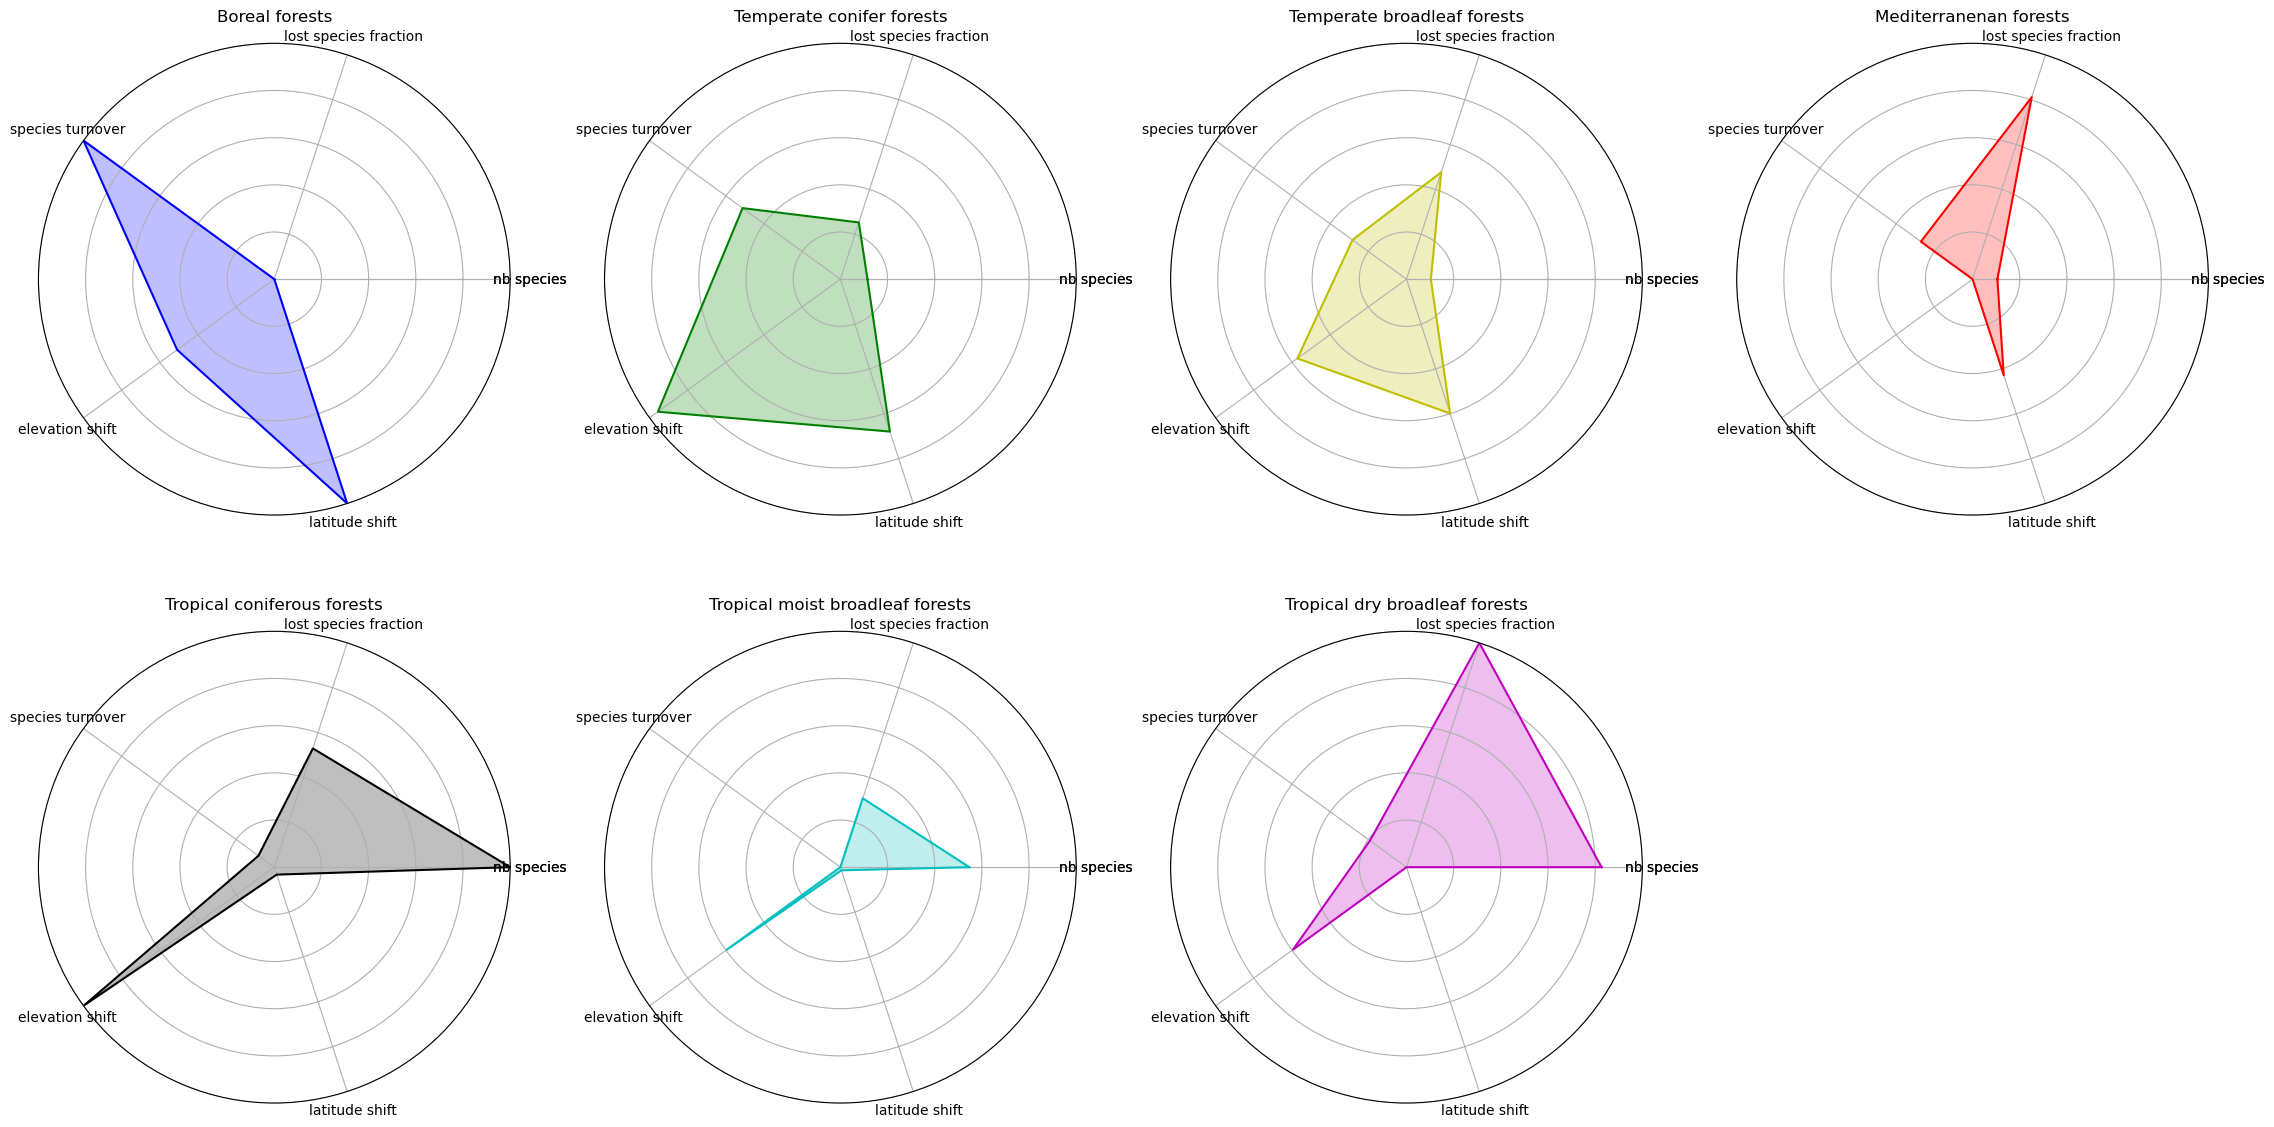

In [91]:
df_lines = [l for l in df_norm.iterrows()]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
colors = ['b','g','y','r', 'k', 'c', 'm']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(28,14), subplot_kw=dict(projection='polar'))#, constrained_layout=True)#, layout='constrained')

for ax, df_line, color in zip(axs.flat[0:len(df_lines)], df_lines, colors):
    vals = list(df_line[1][categories])

    ax.plot(label_loc, vals, label=df_line[0], c=color) #list(df_line[1][categories]), label=df_line[0], c=colors[i])
    ax.fill(label_loc, vals, facecolor=color, alpha=0.25, label='_nolegend_')

    # cat_labels = ["{} = {}".format(cn, int(df_median.loc[df_line[0], c])) for c, cn in zip(categories, cat_names)]
    cat_labels = cat_names
    ax.set_thetagrids(np.degrees(label_loc), labels=cat_labels) #category_labels)
    
    ax.set_title(df_line[0])
    ax.set_ylim(0,1)
    ax.yaxis.set_ticklabels([])

for ax in axs.flat:
    if not bool(ax.has_data()): fig.delaxes(ax) ## delete if nothing is plotted in the axes obj
